In [1]:
from google.colab import files
uploaded = files.upload()

Saving application_data.csv to application_data.csv


In [2]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 64.4 MB/s eta 0:00:00


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd #not there in his code, probably too basic
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay, mean_squared_error, r2_score, confusion_matrix, classification_report, roc_curve, auc,accuracy_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pennylane as qml
from pennylane.kernels import kernel_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import BaseEstimator, ClassifierMixin

In [13]:
#load the data first
df = pd.read_csv('application_data.csv')

In [5]:
#Modify the data, such that we are only selecting the most important feature, as we learnt from the classical ML code
df = df[['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'AMT_INCOME_TOTAL',
             'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
             'REGION_RATING_CLIENT', 'REG_REGION_NOT_WORK_REGION', 'DAYS_LAST_PHONE_CHANGE']]

In [6]:
#Data Processing
print(df.shape)
print(df.info())

(307511, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      307511 non-null  int64  
 1   NAME_CONTRACT_TYPE          307511 non-null  object 
 2   CODE_GENDER                 307511 non-null  object 
 3   FLAG_OWN_CAR                307511 non-null  object 
 4   AMT_INCOME_TOTAL            307511 non-null  float64
 5   AMT_CREDIT                  307511 non-null  float64
 6   AMT_ANNUITY                 307499 non-null  float64
 7   AMT_GOODS_PRICE             307233 non-null  float64
 8   NAME_EDUCATION_TYPE         307511 non-null  object 
 9   OCCUPATION_TYPE             211120 non-null  object 
 10  CNT_FAM_MEMBERS             307509 non-null  float64
 11  REGION_RATING_CLIENT        307511 non-null  int64  
 12  REG_REGION_NOT_WORK_REGION  307511 non-null  int64  
 13  D

In [7]:
df.isna().sum()

,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,12
AMT_GOODS_PRICE,278
NAME_EDUCATION_TYPE,0
OCCUPATION_TYPE,96391


In [8]:
df.dropna(inplace=True)

In [9]:
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.difference(["TARGET"])
categorical_features = df.select_dtypes(include=["object"]).columns
print(f"Numerical features in data: {numerical_features}, \nCategorical features in data: {categorical_features}")

Numerical features in data: Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL',
       'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT',
       'REG_REGION_NOT_WORK_REGION'],
      dtype='object'), 
Categorical features in data: Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE'],
      dtype='object')


In [12]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
#in this one we actually used the already reduced dataset to choose from, I think it would better to use the full dataset to select the most important features and then use the top four ones which are most correlated to "Target"

# Fit a Random Forest to get feature importances
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Get feature names (after one-hot encoding)
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else df_encoded.drop('TARGET', axis=1).columns

# Rank features by importance
importances = rf.feature_importances_
top_features = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Display top 4 features
print("Top 4 features:")
print(top_features.head(4))

Top 4 features:
CNT_FAM_MEMBERS                                      0.157412
DAYS_LAST_PHONE_CHANGE                               0.084347
NAME_EDUCATION_TYPE_Secondary / secondary special    0.069223
NAME_EDUCATION_TYPE_Higher education                 0.067839
dtype: float64


In [10]:
#Data processing for the ML task Preprocessing: Encode categorical features
categorical_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Target variable and features
X = df_encoded.drop('TARGET', axis=1)
y = df_encoded['TARGET']

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Scale the data for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
print(X_train_scaled.shape)

(307771, 33)


In [21]:
from sklearn.decomposition import PCA

# Reduce to 2 principal components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)
#because the code was very slow

In [22]:
print(X_train_pca.shape), print(X_test_pca.shape)

(307771, 2)
(76943, 2)


(None, None)

In [26]:
#Not just the number of features, but if the number of datapoints is too high, it would be great bottleneck for the kernel methods
X_trainred = X_train_pca[:5000]
X_testred = X_test_pca[:500]

In [27]:
print(X_trainred.shape), print(X_testred.shape)

(5000, 2)
(500, 2)


(None, None)

In [16]:
# # === Quantum Kernel SVM ===
# # ONe thing we can immediately tell from kernel methods is that they are extreme slow, even with 4 qubits.
# n_qubits = 4
# dev = qml.device("default.qubit", wires=n_qubits)

# @qml.qnode(dev)
# def circuit(x):
#     for i in range(n_qubits):
#         qml.RY(x[i], wires=i)
#     qml.templates.StronglyEntanglingLayers(np.ones((2, n_qubits, 3)), wires=range(n_qubits))
#     return qml.state()

# def q_kernel(x1, x2):
#     return np.abs(np.vdot(circuit(x1), circuit(x2)))**2

# K_train = kernel_matrix(X_train_scaled[:, :n_qubits], X_train_scaled[:, :n_qubits], kernel=q_kernel) #distance between the dataset and itself
# K_test = kernel_matrix(X_test_scaled[:, :n_qubits], X_train_scaled[:, :n_qubits], kernel=q_kernel)


# quantum_svm = SVC(kernel='precomputed', probability=True)
# quantum_svm.fit(K_train, y_train)


# y_pred = quantum_svm.predict(K_test)
# y_prob = quantum_svm.predict_proba(K_test)[:, 1]


# print("\nQuantum SVM\n------------")
# print(classification_report(y_test, y_pred))
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
# plt.title('Confusion Matrix - Quantum SVM')

# plt.show()
# fpr, tpr, _ = roc_curve(y_test, y_prob)
# roc_auc = auc(fpr, tpr)
# plt.figure()
# plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], 'k--')
# plt.title('ROC Curve - Quantum SVM')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend(loc='lower right')
# plt.show()
# precision, recall, _ = precision_recall_curve(y_test, y_prob)
# plt.figure()
# plt.plot(recall, precision, label='Precision-Recall Curve')
# plt.title('Precision-Recall Curve - Quantum SVM')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.legend(loc='lower left')
# plt.show()



Quantum SVM
------------
              precision    recall  f1-score   support

           0       0.56      0.71      0.62         7
           1       0.82      0.69      0.75        13

    accuracy                           0.70        20
   macro avg       0.69      0.70      0.69        20
weighted avg       0.73      0.70      0.71        20



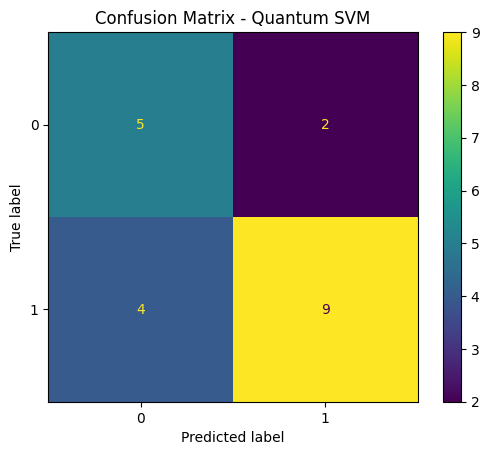

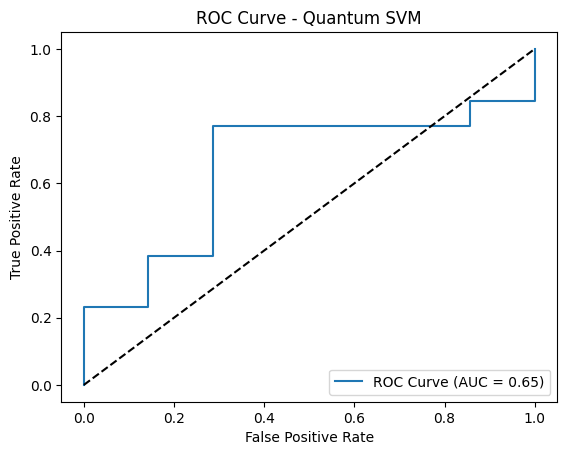

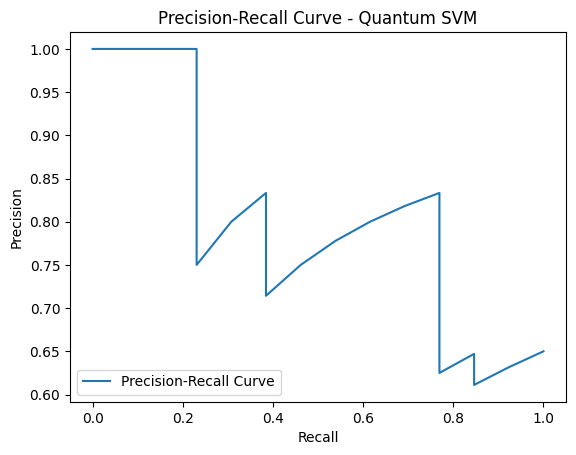

In [33]:
# === Quantum Circuit Setup === #
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def circuit(x):
    for i in range(n_qubits):
        qml.RY(x[i], wires=i)
    qml.templates.StronglyEntanglingLayers(np.ones((2, n_qubits, 3)), wires=range(n_qubits))
    return qml.state()

def q_kernel(x1, x2):
    return np.abs(np.vdot(circuit(x1), circuit(x2)))**2

# === Kernel Matrix Computation === #
def kernel_matrix(X1, X2, kernel):
    n_samples_1 = X1.shape[0]
    n_samples_2 = X2.shape[0]
    K = np.zeros((n_samples_1, n_samples_2))
    for i in range(n_samples_1):
        for j in range(n_samples_2):
            K[i, j] = kernel(X1[i], X2[j])
    return K

# === Use reduced data === #
X_trainred = X_train_pca[:300]
X_testred = X_test_pca[:20]
y_trainred = y_train[:300]
y_testred = y_test[:20]

# Compute quantum kernel matrices
K_train = kernel_matrix(X_trainred, X_trainred, kernel=q_kernel)
K_test = kernel_matrix(X_testred, X_trainred, kernel=q_kernel)

# === SVM Training === #
quantum_svm = SVC(kernel='precomputed', probability=True)
quantum_svm.fit(K_train, y_trainred)

# === Predictions & Evaluation === #
y_pred = quantum_svm.predict(K_test)
y_prob = quantum_svm.predict_proba(K_test)[:, 1]

print("\nQuantum SVM\n------------")
print(classification_report(y_testred, y_pred))

ConfusionMatrixDisplay.from_predictions(y_testred, y_pred)
plt.title('Confusion Matrix - Quantum SVM')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_testred, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Quantum SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_testred, y_prob)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.title('Precision-Recall Curve - Quantum SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()


We will use another model of code of the SVM with the basis encoding
give in this one :
https://towardsdatascience.com/a-simple-introduction-to-quantum-enhanced-svm-bee893a4377c/

In [39]:
import pennylane as qml
from pennylane import numpy as np

from sklearn.svm import SVC


# === Setup: Using 2 Qubits, PCA-reduced and dataset-limited === #
n_qubits = 2
X_trainred = X_train_pca[:800]
X_testred = X_test_pca[:50]
y_trainred = y_train[:800]
y_testred = y_test[:50]

# === Quantum Kernel Circuit with Basis Embedding === #
wires = list(range(n_qubits))
dev = qml.device("default.qubit", wires=n_qubits, shots=None)

def layer(x):
    qml.BasisEmbedding(x.astype(int), wires=wires)
    for j, wire in enumerate(wires):
        qml.Hadamard(wires=wire)
        qml.CNOT(wires=[wire, wires[(j + 1) % n_qubits]])

def ansatz(x, wires):
    layer(x)

adjoint_ansatz = qml.adjoint(ansatz)

@qml.qnode(dev)
def kernel_circuit(x1, x2):
    ansatz(x1, wires=wires)
    adjoint_ansatz(x2, wires=wires)
    return qml.probs(wires=wires)

def kernel(x1, x2):
    return kernel_circuit(x1, x2)[0]

# === Quantize features (BasisEmbedding expects binary input) === #
X_train_bin = (X_trainred > 0).astype(int)
X_test_bin = (X_testred > 0).astype(int)

# === Quantum Kernel Matrix === #
init_kernel = lambda x1, x2: kernel(x1, x2)
K_train = qml.kernels.square_kernel_matrix(X_train_bin, init_kernel, assume_normalized_kernel=True)
K_test = qml.kernels.kernel_matrix(X_test_bin, X_train_bin, init_kernel)

# === Quantum SVM === #
svm_quantum = SVC(kernel='precomputed', probability=True)
svm_quantum.fit(K_train, y_trainred)
y_pred_q = svm_quantum.predict(K_test)


Quantum SVM
------------
              precision    recall  f1-score   support

           0       0.32      0.47      0.38        19
           1       0.55      0.39      0.45        31

    accuracy                           0.42        50
   macro avg       0.43      0.43      0.42        50
weighted avg       0.46      0.42      0.43        50



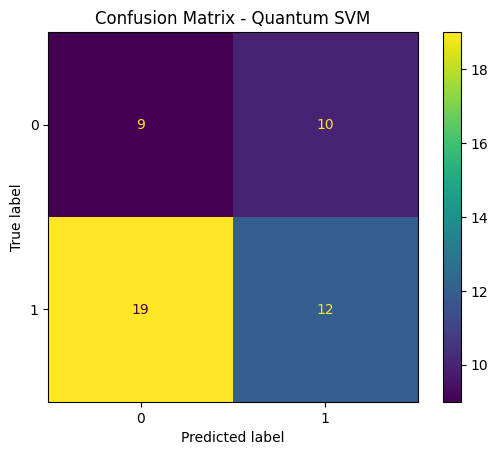

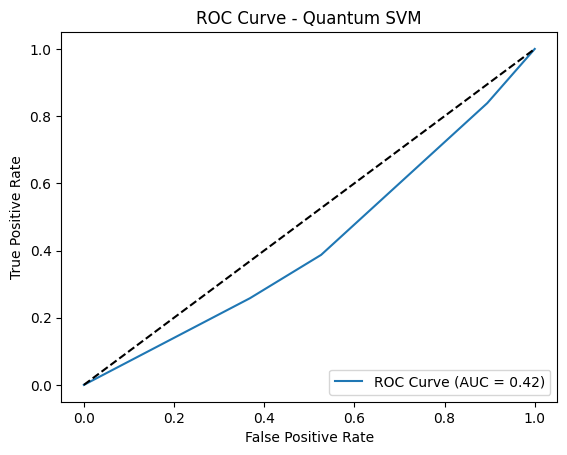

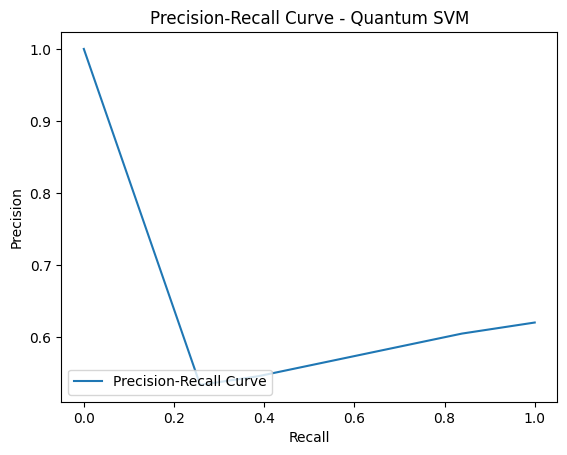

In [40]:
# === Predictions & Evaluation === #
y_pred = svm_quantum.predict(K_test)
y_prob = svm_quantum.predict_proba(K_test)[:, 1]

print("\nQuantum SVM\n------------")
print(classification_report(y_testred, y_pred))

ConfusionMatrixDisplay.from_predictions(y_testred, y_pred)
plt.title('Confusion Matrix - Quantum SVM')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_testred, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Quantum SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_testred, y_prob)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.title('Precision-Recall Curve - Quantum SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()


In [41]:
# === Metrics === #
print("\nQuantum SVM (Basis Embedding)")
print("-------------------------------")
print("Accuracy:", accuracy_score(y_testred, y_pred_q))
print("Precision:", precision_score(y_testred, y_pred_q))
print("Recall:", recall_score(y_testred, y_pred_q))
print("F1 Score (macro):", f1_score(y_testred, y_pred_q, average='macro'))

# === Classical RBF SVM Baseline === #
svm_rbf = SVC(gamma='auto', kernel='rbf')
svm_rbf.fit(X_trainred, y_trainred)
y_pred_rbf = svm_rbf.predict(X_testred)

print("\nClassical SVM (RBF Kernel)")
print("----------------------------")
print("Accuracy:", accuracy_score(y_testred, y_pred_rbf))
print("Precision:", precision_score(y_testred, y_pred_rbf))
print("Recall:", recall_score(y_testred, y_pred_rbf))
print("F1 Score (macro):", f1_score(y_testred, y_pred_rbf, average='macro'))



Quantum SVM (Basis Embedding)
-------------------------------
Accuracy: 0.42
Precision: 0.5454545454545454
Recall: 0.3870967741935484
F1 Score (macro): 0.4179044560417503

Classical SVM (RBF Kernel)
----------------------------
Accuracy: 0.48
Precision: 0.6190476190476191
Recall: 0.41935483870967744
F1 Score (macro): 0.47916666666666663
